1.Handle missing data in different ways
2.Correct the data type of different data values as per requirement
3.Standardize and normalize the appropriate data attributes
4.Visualize the data as grouped bar graph using Binning
5.Converting a categorical data into numerical indicator variables
6.Visualize individual feature patterns7.
Run descriptive statistical analysis on the dataset8.
Use groups and pivot tables to find effect of categorical variables on Pric9.e
Use Pearson Correlation to measure the interdependence between variab
10.Use training, testing and cross validation to improve the performance of the dataset.11.
Identify the point of overfitting of a model12.
Use Ridge Regression to identify the change in performance of a model based on its hyperparameter13.s
Use Grid Search to identify the best performing model using different hyperparametersles


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [3]:
import easygui as eg

In [4]:
eg.fileopenbox()

'C:\\Users\\cva1001\\Downloads\\laptop_pricing_dataset_mod1.csv'

In [5]:
url='C:\\Users\\cva1001\\Downloads\\laptop_pricing_dataset_mod1.csv'

In [6]:
path='laptop_pricing_analysis.csv'

In [8]:
df=pd.read_csv(url)
df

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,Lenovo,4,IPS Panel,2,1,7,35.560,2.6,8,256,1.70,1891
234,234,Toshiba,3,Full HD,2,1,5,33.782,2.4,8,256,1.20,1950
235,235,Lenovo,4,IPS Panel,2,1,5,30.480,2.6,8,256,1.36,2236
236,236,Lenovo,3,Full HD,3,1,5,39.624,2.5,6,256,2.40,883


In [9]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [10]:
df

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
...,...,...,...,...,...,...,...,...,...,...,...,...
233,Lenovo,4,IPS Panel,2,1,7,35.560,2.6,8,256,1.70,1891
234,Toshiba,3,Full HD,2,1,5,33.782,2.4,8,256,1.20,1950
235,Lenovo,4,IPS Panel,2,1,5,30.480,2.6,8,256,1.36,2236
236,Lenovo,3,Full HD,3,1,5,39.624,2.5,6,256,2.40,883


In [11]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Manufacturer    238 non-null    object 
 1   Category        238 non-null    int64  
 2   Screen          238 non-null    object 
 3   GPU             238 non-null    int64  
 4   OS              238 non-null    int64  
 5   CPU_core        238 non-null    int64  
 6   Screen_Size_cm  234 non-null    float64
 7   CPU_frequency   238 non-null    float64
 8   RAM_GB          238 non-null    int64  
 9   Storage_GB_SSD  238 non-null    int64  
 10  Weight_kg       233 non-null    float64
 11  Price           238 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 22.4+ KB
None


In [12]:
#round off the decimal point of column Screen_Size_cm
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837
...,...,...,...,...,...,...,...,...,...,...,...,...
233,Lenovo,4,IPS Panel,2,1,7,35.56,2.6,8,256,1.70,1891
234,Toshiba,3,Full HD,2,1,5,33.78,2.4,8,256,1.20,1950
235,Lenovo,4,IPS Panel,2,1,5,30.48,2.6,8,256,1.36,2236
236,Lenovo,3,Full HD,3,1,5,39.62,2.5,6,256,2.40,883


In [13]:
#Evaluate the dataset for missing data
df.isnull().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

In [14]:
#Replace with mean
avg_wght=df['Weight_kg'].sum()/df['Weight_kg'].count()

In [15]:
print(avg_wght)

1.8622317596566522


In [16]:
df["Weight_kg"].replace(np.nan, avg_wght, inplace=True)

In [17]:
df

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837
...,...,...,...,...,...,...,...,...,...,...,...,...
233,Lenovo,4,IPS Panel,2,1,7,35.56,2.6,8,256,1.70,1891
234,Toshiba,3,Full HD,2,1,5,33.78,2.4,8,256,1.20,1950
235,Lenovo,4,IPS Panel,2,1,5,30.48,2.6,8,256,1.36,2236
236,Lenovo,3,Full HD,3,1,5,39.62,2.5,6,256,2.40,883


In [18]:
#replace with frequent value
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
df["Screen_Size_cm"].replace(np.nan, common_screen_size, inplace=True)

In [19]:
#to know  the data typed
df[["Weight_kg","Screen_Size_cm"]].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Weight_kg       238 non-null    float64
 1   Screen_Size_cm  238 non-null    float64
dtypes: float64(2)
memory usage: 3.8 KB


In [20]:
#change the screen size centimeter to inches 
df["Screen_Size_cm"] = df["Screen_Size_cm"]/2.54
df.rename(columns={'Screen_Size_cm':'Screen_Size_inch'}, inplace=True)

In [21]:
df


,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,14.000000,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,15.598425,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,15.598425,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,13.299213,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,15.598425,1.8,8,256,1.91,837
...,...,...,...,...,...,...,...,...,...,...,...,...
233,Lenovo,4,IPS Panel,2,1,7,14.000000,2.6,8,256,1.70,1891
234,Toshiba,3,Full HD,2,1,5,13.299213,2.4,8,256,1.20,1950
235,Lenovo,4,IPS Panel,2,1,5,12.000000,2.6,8,256,1.36,2236
236,Lenovo,3,Full HD,3,1,5,15.598425,2.5,6,256,2.40,883


In [22]:
df["Weight_kg"] = df["Weight_kg"]*2.205
df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace=True)

In [23]:
df

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,Acer,4,IPS Panel,2,1,5,14.000000,1.6,8,256,3.52800,978
1,Dell,3,Full HD,1,1,3,15.598425,2.0,4,256,4.85100,634
2,Dell,3,Full HD,1,1,7,15.598425,2.7,8,256,4.85100,946
3,Dell,4,IPS Panel,2,1,5,13.299213,1.6,8,128,2.69010,1244
4,HP,4,Full HD,2,1,7,15.598425,1.8,8,256,4.21155,837
...,...,...,...,...,...,...,...,...,...,...,...,...
233,Lenovo,4,IPS Panel,2,1,7,14.000000,2.6,8,256,3.74850,1891
234,Toshiba,3,Full HD,2,1,5,13.299213,2.4,8,256,2.64600,1950
235,Lenovo,4,IPS Panel,2,1,5,12.000000,2.6,8,256,2.99880,2236
236,Lenovo,3,Full HD,3,1,5,15.598425,2.5,6,256,5.29200,883


In [24]:
df['Price']

0       978
1       634
2       946
3      1244
4       837
       ... 
233    1891
234    1950
235    2236
236     883
237    1499
Name: Price, Length: 238, dtype: int64

In [25]:
#Binning
bins=np.linspace(min(df['Price']),max(df['Price']),4)

In [26]:
bins

array([ 527.        , 1621.33333333, 2715.66666667, 3810.        ])

In [27]:
group_names=['Low','Medium','Large']

In [28]:
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True )

In [29]:
df['Price-binned']

0         Low
1         Low
2         Low
3         Low
4         Low
        ...  
233    Medium
234    Medium
235    Medium
236       Low
237       Low
Name: Price-binned, Length: 238, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'Large']

In [30]:
#Data Normalization
df['CPU_frequency']=df['CPU_frequency']/df['CPU_frequency'].max()

In [31]:
df['CPU_frequency']

0      0.551724
1      0.689655
2      0.931034
3      0.551724
4      0.620690
         ...   
233    0.896552
234    0.827586
235    0.896552
236    0.862069
237    0.793103
Name: CPU_frequency, Length: 238, dtype: float64

In [32]:
df['Screen']

0      IPS Panel
1        Full HD
2        Full HD
3      IPS Panel
4        Full HD
         ...    
233    IPS Panel
234      Full HD
235    IPS Panel
236      Full HD
237      Full HD
Name: Screen, Length: 238, dtype: object

In [34]:
##indicator variable
df_dummy_var=pd.get_dummies(df['Screen'])
df_dummy_var.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, df_dummy_var], axis=1)

In [35]:
df

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,IPS Panel,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,False,True
1,Dell,3,Full HD,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,True,False
2,Dell,3,Full HD,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,True,False
3,Dell,4,IPS Panel,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,False,True
4,HP,4,Full HD,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Lenovo,4,IPS Panel,2,1,7,14.000000,0.896552,8,256,3.74850,1891,Medium,False,True
234,Toshiba,3,Full HD,2,1,5,13.299213,0.827586,8,256,2.64600,1950,Medium,True,False
235,Lenovo,4,IPS Panel,2,1,5,12.000000,0.896552,8,256,2.99880,2236,Medium,False,True
236,Lenovo,3,Full HD,3,1,5,15.598425,0.862069,6,256,5.29200,883,Low,True,False


In [36]:
df.drop("Screen", axis = 1, inplace=True)



In [37]:
df

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,False,True
1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,True,False
2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,True,False
3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,False,True
4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Lenovo,4,2,1,7,14.000000,0.896552,8,256,3.74850,1891,Medium,False,True
234,Toshiba,3,2,1,5,13.299213,0.827586,8,256,2.64600,1950,Medium,True,False
235,Lenovo,4,2,1,5,12.000000,0.896552,8,256,2.99880,2236,Medium,False,True
236,Lenovo,3,3,1,5,15.598425,0.862069,6,256,5.29200,883,Low,True,False


In [38]:
df.to_csv(path)

<Axes: xlabel='CPU_frequency', ylabel='Price'>

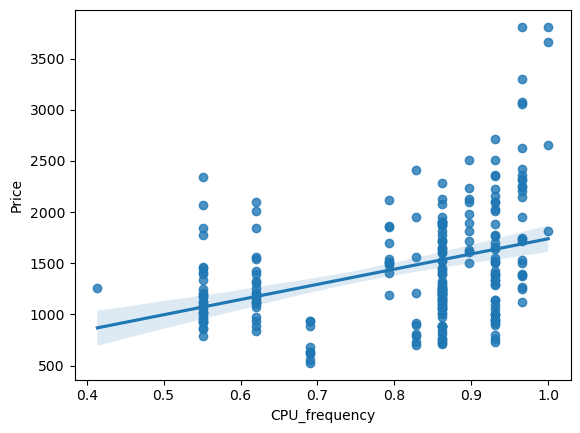

In [39]:
# CPU_frequency plot
sns.regplot(x=df['CPU_frequency'],y=df['Price'])


<Axes: xlabel='Screen_Size_inch', ylabel='Price'>

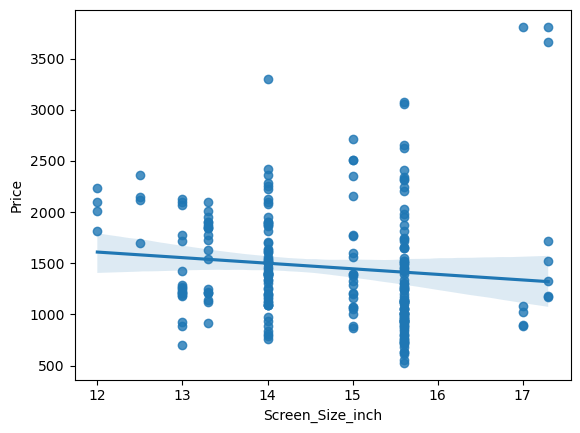

In [40]:
# Screen_Size_inch plot

sns.regplot(x="Screen_Size_inch", y="Price", data=df)

<Axes: xlabel='Weight_pounds', ylabel='Price'>

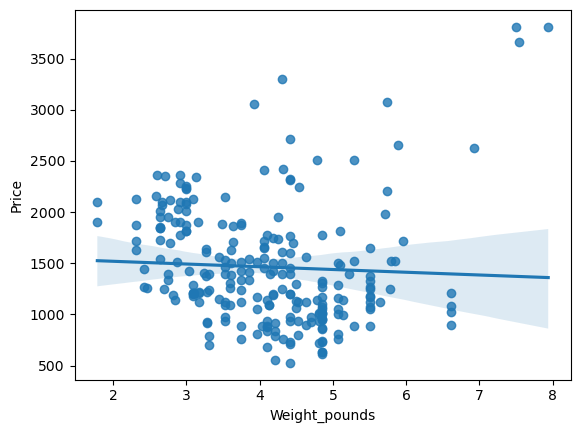

In [41]:
# Weight_pounds plot

sns.regplot(x="Weight_pounds", y="Price", data=df)


In [42]:
# finsing the Correlation values of the three attributes with Price

for var in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"Correlation of Price and {var} is ")
    print(df[[var,'Price']].corr())

Correlation of Price and CPU_frequency is 
               CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is 
                  Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110565
Price                    -0.110565  1.000000
Correlation of Price and Weight_pounds is 
               Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


<Axes: xlabel='Category', ylabel='Price'>

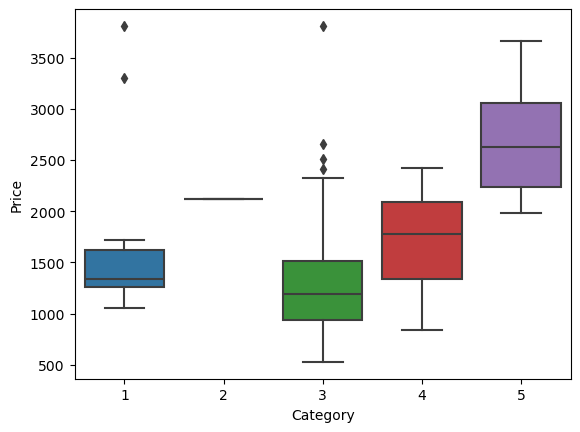

In [43]:
sns.boxplot(x=df['Category'],y=df['Price'])

<Axes: xlabel='GPU', ylabel='Price'>

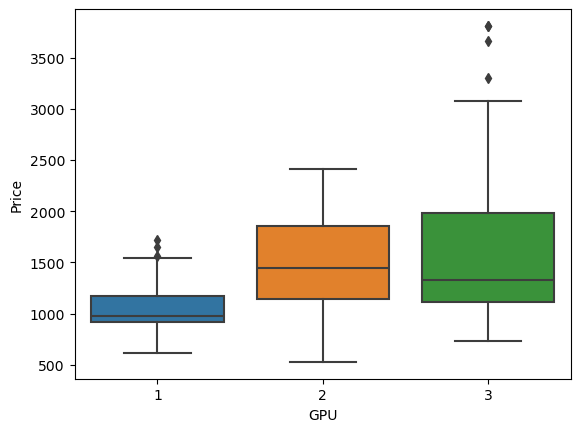

In [44]:
sns.boxplot(x=df['GPU'],y=df['Price'])

<Axes: xlabel='RAM_GB', ylabel='Price'>

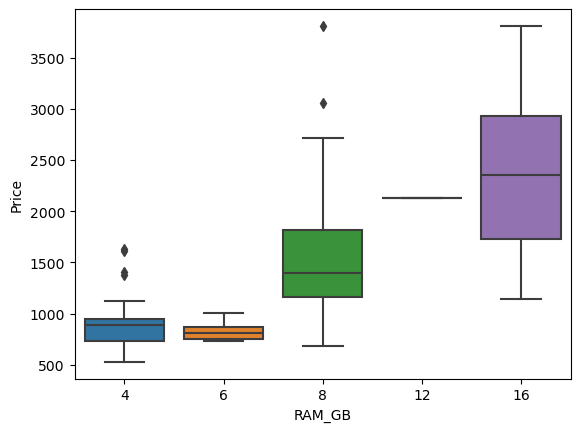

In [45]:
sns.boxplot(x=df["RAM_GB"], y=df["Price"])



<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

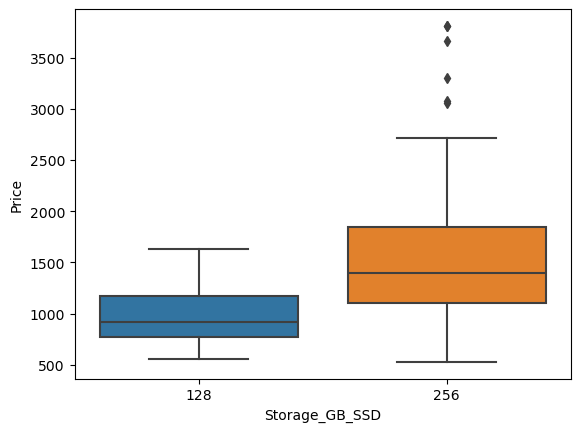

In [46]:
sns.boxplot(x=df["Storage_GB_SSD"], y=df["Price"])

In [47]:
print(df.describe())

         Category         GPU          OS    CPU_core  Screen_Size_inch  \
count  238.000000  238.000000  238.000000  238.000000        238.000000   
mean     3.205882    2.151261    1.058824    5.630252         14.687951   
std      0.776533    0.638282    0.235790    1.241787          1.165589   
min      1.000000    1.000000    1.000000    3.000000         12.000000   
25%      3.000000    2.000000    1.000000    5.000000         14.000000   
50%      3.000000    2.000000    1.000000    5.000000         15.000000   
75%      4.000000    3.000000    1.000000    7.000000         15.598425   
max      5.000000    3.000000    2.000000    7.000000         17.299213   

       CPU_frequency      RAM_GB  Storage_GB_SSD  Weight_pounds        Price  
count     238.000000  238.000000      238.000000     238.000000   238.000000  
mean        0.813822    7.882353      245.781513       4.106221  1462.344538  
std         0.141860    2.482603       34.765316       1.078442   574.607699  
min     

In [48]:
print(df.describe(include=['object']))

       Manufacturer
count           238
unique           11
top            Dell
freq             71


In [49]:
#Create the group data for gpu and cpu_core
df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
print(grouped_test1)

   GPU  CPU_core        Price
0    1         3   769.250000
1    1         5   998.500000
2    1         7  1167.941176
3    2         3   785.076923
4    2         5  1462.197674
5    2         7  1744.621622
6    3         3   784.000000
7    3         5  1220.680000
8    3         7  1945.097561


In [50]:
#Pivot_Table for GPU and CPU_core
grouped_pivot = grouped_test1.pivot(index='GPU',columns='CPU_core')
print(grouped_pivot)

               Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


In [51]:
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)

RAM_GB
The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857841  with a P-value of P = 3.6815606288429613e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is 0.36666555892588604  with a P-value of P = 5.5024633507134225e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.24342075521810294  with a P-value of P = 0.00014898923191724174
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.11056471275425062  with a P-value of P = 0.08876456732700777
Weight_pounds
The Pearson Correlation Coefficient for  Weight_pounds  is -0.050312258377515455  with a P-value of P = 0.43976938534338944
CPU_core
The Pearson Correlation Coefficient for  CPU_core  is 0.45939777733551157  with a P-value of P = 7.912950127009034e-14
OS
The Pearson Correlation Coefficient for  OS  is -0.2217298011482738  with a P-value of P = 0.0005696642559246749
GPU
The Pearson Correlation Coefficient for  GPU  is 0.2882981988881428

In [52]:
#Using Cross validation to improve the model

y_data=df['Price']
x_data=df.drop('Price',axis=1)

In [53]:
print(y_data)

0       978
1       634
2       946
3      1244
4       837
       ... 
233    1891
234    1950
235    2236
236     883
237    1499
Name: Price, Length: 238, dtype: int64


In [54]:
#Split the data set into training and testing subests such that we reserve 30% of the data set for testing purposes.
#x-train -- without price,y_train = only price
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,test_size=0.30, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 72
number of training samples: 166


In [1]:
#print(x_data)
#print(x_test)
#print(y_train)
#print(y_test) 
#y_train.info()
#x_train[['CPU_frequency']].info()

In [56]:
#Create a single variable linear regression model using "CPU_frequency" parameter. Print the R^2 value of this model for the training and testing subs
lre=LinearRegression()
fnd_fit=lre.fit(x_train[['CPU_frequency']], y_train)
print("The coefficient of determination for testing data's are :", lre.score(x_test[['CPU_frequency']], y_test))
print("The coefficient of determination for training data's are:", lre.score(x_train[['CPU_frequency']], y_train))


The coefficient of determination for testing data's are : -0.032648804536480336
The coefficient of determination for training data's are: 0.1741513805090481


In [57]:
#Run a 4-fold cross validation on the model and find the mean value of R^2 score along with its standard deviation.
Rcross = cross_val_score(lre, x_data[['CPU_frequency']], y_data, cv=4)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are -0.16109232388595096 and the standard deviation is 0.3849579786664708


In [58]:
#To identify the point of overfitting the model on the parameter "CPU_frequency", 
#need to create polynomial features using the single attribute.
#need to evaluate the R^2 scores of the model created using different degrees of polynomial features, ranging from 1 to 5. Save this set of values of R^2 score as a list
lre = LinearRegression()
Rsqu_test = []
order = [1, 2, 3, 4, 5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])   
    lre.fit(x_train_pr, y_train)
    Rsqu_test.append(lre.score(x_test_pr, y_test))
    print(f"The coefficient of determination for the polynomial feautre data's" , n ,'degree:' ,lre.score(x_train_pr,y_train))
   

The coefficient of determination for the polynomial feautre data's 1 degree: 0.17415138050904821
The coefficient of determination for the polynomial feautre data's 2 degree: 0.29368491957043663
The coefficient of determination for the polynomial feautre data's 3 degree: 0.32409110586056067
The coefficient of determination for the polynomial feautre data's 4 degree: 0.3484587835440479
The coefficient of determination for the polynomial feautre data's 5 degree: 0.38829959096339484


Text(0.5, 1.0, 'R^2 Using Test Data')

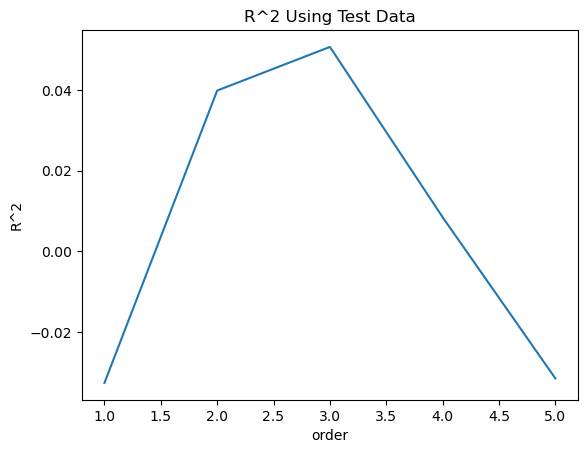

In [129]:
#Plot the values of R^2 scores against the order. Note the point where the score drops.

plt.plot( order,Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

Text(0, 0.5, 'Rsqu_test')

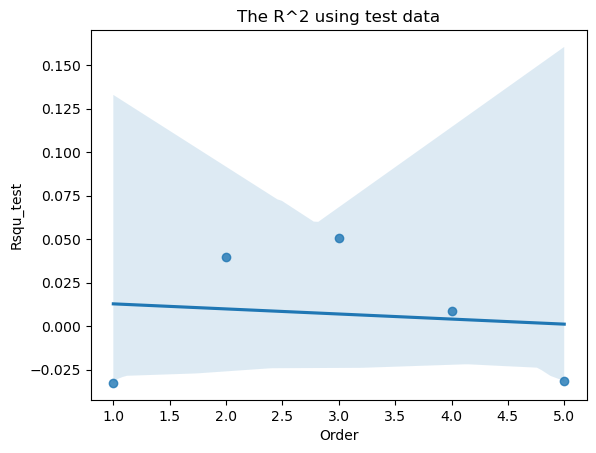

In [59]:
#Regression plot for the coefficient of determination against order
sns.regplot(x=order,y=Rsqu_test)
plt.title("The R^2 using test data")
plt.xlabel("Order")
plt.ylabel("Rsqu_test")

In [62]:
#Ridge Regression
#Now consider that you have multiple features, i.e. 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU' and 'Category'. Create a polynomial feature model that uses all these parameters with degree=2. Also create the training and testing attribute sets

pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr=pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])


In [63]:
#Create a Ridge Regression model and evaluate it using values of the hyperparameter alpha ranging from 0.001 to 1 with increments of 0.001. Create a list of all Ridge Regression R^2 scores for training and testing data.

Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)
#print(f"The coefficient of determination for the polynomial feautre data's",RigeModel.score(x_train_pr,y_train))
    

100%|███████████████████████████████████████████| 999/999 [00:09<00:00, 104.87it/s, Test Score=0.51, Train Score=0.635]


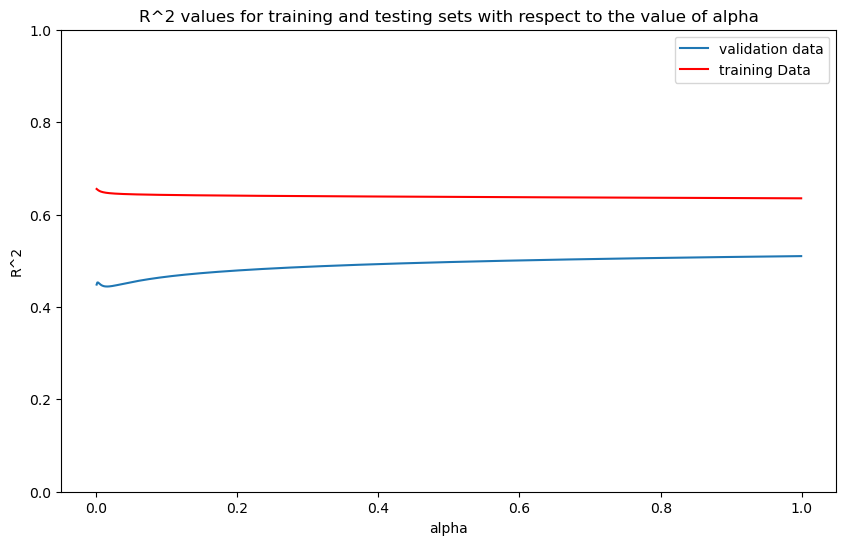

In [66]:
#Plot the R^2 values for training and testing sets with respect to the value of alpha
plt.figure(figsize=(10, 6))  
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.title('R^2 values for training and testing sets with respect to the value of alpha')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()

In [67]:
#find the GrindSearch
#Using the raw data and the same set of features as used above, use GridSearchCV to identify the value of alpha for which the model performs best. Assume the set of alpha values to be used as

#{0.0001, 0.001, 0.01, 0.1, 1, 10}
parameters1= [{'alpha': [0.0001,0.001,0.01, 0.1, 1, 10]}]

#Create a Ridge instance and run Grid Search using a 4 fold cross validation.
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)

#Fit the Grid Search to the training data.
Grid1.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_train)



GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

In [69]:
#Print the R^2 score for the test data using the estimator that uses the derived optimum value of alpha.
BestRR=Grid1.best_estimator_
print("The coefficient of determination by using GridSearch is: ",BestRR.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']], y_test))

The coefficient of determination by using GridSearch is:  0.40395559625092636
